<font size=6><b>brain tumor canseer</b></font>

<font seize='3'>Dataset Overview:

The dataset consists of several important features that help classify tumors into benign or malignant categories. Below are some of the key attributes:
Diagnosis: This column indicates whether the tumor is benign (B) or malignant (M). It is the target variable we aim to predict.
Radius Mean: This feature measures the mean radius of the tumor cells. It is a crucial factor that often correlates with the size of the tumor.
Texture Mean: This feature represents the mean texture of the tumor, which is calculated from gray-scale values in the images. The texture can provide insights into the malignancy of the tumor.
Perimeter Mean: Similar to radius, the perimeter measures how far around the tumor is. A higher perimeter might indicate a larger and potentially more dangerous tumor.
Area Mean: This represents the area occupied by the tumor. The size of the tumor is an essential aspect when determining its potential threat.
Smoothness Mean: This feature measures the smoothness of the tumor surface. Tumors with a rough surface texture can often be more aggressive.
Compactness Mean: This feature describes the shape of the tumor; higher values indicate a more compact (and potentially dangerous) tumor shape.
These features collectively provide a comprehensive view to help healthcare professionals and researchers accurately determine the nature of the tumors and apply appropriate treatments.</font>>

<font size="3">Importing Required Libraries:

In this section, we import the necessary libraries for data handling, visualization, preprocessing, and building the deep learning model.</font>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import classification_report , accuracy_score , f1_score , confusion_matrix , precision_score , recall_score , roc_curve, auc
from sklearn.preprocessing import  LabelEncoder , MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint , ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle
tf.random.set_seed(42)
np.random.seed(42)

<font size=3>Loading and Exploring the Dataset

We load the dataset and check its structure. This helps us understand what kind of data we are working with.</font>

In [2]:
data = pd.read_csv("./data.csv")
data.drop(columns=["Unnamed: 32" , "id"] , inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<font size=3> Exploratory Data Analysis (EDA)

In this section, we check the basic structure of the dataset and look for missing values or abnormal data.
</font>

In [3]:
np.unique(data['diagnosis'] , return_counts=True)

(array(['B', 'M'], dtype=object), array([357, 212], dtype=int64))

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
data.shape

(569, 31)

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<font size="3">Dataset Statistical Summary Description:

The statistical summary of the brain cancer dataset provides an overview of the key characteristics and metrics associated with the data. This summary includes essential statistical measures such as:
Count: The number of observations in each feature of the dataset, indicating the completeness of data.
Mean: The average value of each feature, helping to understand the typical magnitude of the data points.
Standard Deviation: A measure of the variability or dispersion of the data points from the mean, indicating the degree of spread or concentration.
Minimum: The smallest value recorded for each feature, giving insight into the lower bounds of the dataset.
25th Percentile (Q1): The value below which 25% of the data falls, providing an understanding of the lower quartile.
50th Percentile (Median): The middle value of the dataset, showcasing the central tendency of the feature.
75th Percentile (Q3): The value below which 75% of the data falls, helping to assess the upper quartile.
Maximum: The largest value observed for each feature, revealing the upper limits of the dataset.
This statistical summary is crucial for understanding the distribution of features within the dataset, aiding in the identification of patterns and anomalies that may impact the classification of tumors as benign or malignant.</font

In [8]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
## This code snippet applies Label Encoding to the 'diagnosis' column 
## of the brain cancer dataset. The 'diagnosis' column contains 
## categorical values (e.g., 'B' for benign and 'M' for malignant). 
## The Label Encoder will convert these categorical labels into 
## numeric format, allowing for easier processing during model training.
encoder = LabelEncoder()
data["diagnosis"] = encoder.fit_transform(data['diagnosis'])

In [10]:
data.groupby('diagnosis')['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [11]:
## This code calculates the correlation matrix for the features in the brain cancer dataset. 
## The correlation matrix provides insights into the relationships between different variables, 
## indicating how strongly they are associated with one another. 
## This information can be valuable for understanding feature interactions and 
## may inform feature selection for model training
data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [12]:
## This code selects the independent features (X) and the target variable (y) 
## from the brain cancer dataset. 'X' includes all the relevant features used for prediction, 
## while 'y' contains the target values indicating the tumor type (benign or malignant).
X = data.iloc[:,1:]
y = data.iloc[:,0]

<font size=3>class weights</font>

In [13]:
data.groupby('diagnosis')['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [14]:
np.unique(y , return_counts=True)

(array([0, 1]), array([357, 212], dtype=int64))

<font size=3>Splitting Data into Training and Testing Sets

We split the dataset into training and testing sets using a fixed random seed for reproducibility.</font>


In [15]:
x_train , x_test , y_train , y_test = train_test_split(X , y , random_state=42)

In [16]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
print(class_weights)

[0.79477612 1.34810127]


In [17]:
weights = dict(zip(np.unique(y_train), class_weights))
weights

{0: 0.7947761194029851, 1: 1.3481012658227849}

In [18]:
model_rfc = RandomForestClassifier(class_weight=weights , random_state=42)
params = {
    "max_depth":[4,5,6,10],
    "min_samples_split":[2,3],
    "n_estimators":[100,200,300,400,500]
}
grid_search_rfc = GridSearchCV(estimator=model_rfc , cv=3 , scoring="accuracy" , param_grid=params , n_jobs=-1 , verbose=2)
grid_search_rfc.fit(x_train , y_train)
print(grid_search_rfc.best_params_)
print(grid_search_rfc.best_score_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 100}
0.960093896713615


In [19]:
y_pred = grid_search_rfc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        89
           1       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [20]:
y_pred_train = grid_search_rfc.predict(x_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      0.99      1.00       158

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



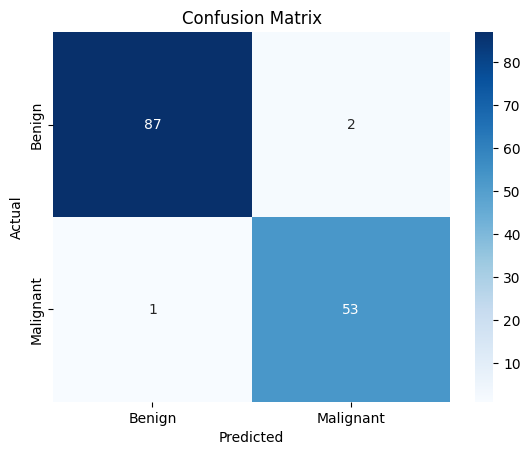

In [21]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix,annot=True ,cmap='Blues' , xticklabels=['Benign','Malignant'] , yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

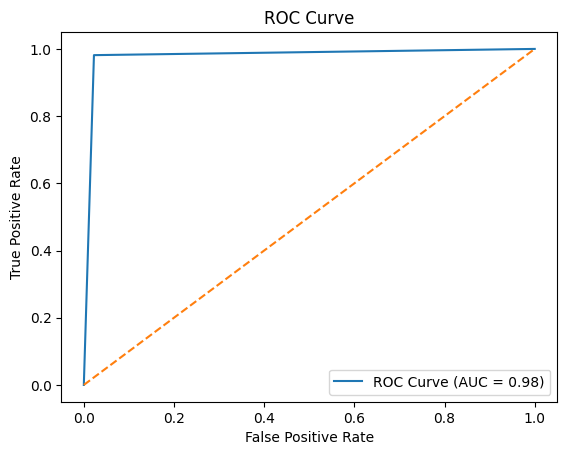

In [22]:
y_probs = grid_search_rfc.predict(x_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [23]:
with open("RandomForestClassifier model" , "wb") as file:
    pickle.dump(model_rfc , file)

In [24]:
print(f"f1 score : {f1_score(y_test , y_pred)}")
print(f"precision_score : {precision_score(y_test,y_pred)}")
print(f"recall_score : {recall_score(y_test,y_pred)}")
print(f"accuracy_score : {accuracy_score(y_test , y_pred)}")

f1 score : 0.9724770642201834
precision_score : 0.9636363636363636
recall_score : 0.9814814814814815
accuracy_score : 0.9790209790209791


In [25]:
model_xgb = XGBClassifier(class_weights=weights)
model_xgb.fit(x_train , y_train)
y_pred = model_xgb.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



c:\Users\T A T\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:158: UserWarning: [16:58:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weights" } are not used.

  warnings.warn(smsg, UserWarning)


In [26]:
params = {
    "n_estimators":[100,200,300,400,500],
    "learning_rate":[0.1,0.01,0.05],
    "max_depth":[4,6,10],
    "sunsample":[0.8,0.9,1]
}
grid_search_xgb = GridSearchCV(estimator=model_xgb , cv=3 , param_grid=params , scoring="accuracy" , n_jobs=-1)
grid_search_xgb.fit(x_train , y_train)
print(grid_search_xgb.best_params_)
print(grid_search_xgb.best_score_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'sunsample': 0.8}
0.9647887323943664


c:\Users\T A T\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:158: UserWarning: [16:58:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weights", "sunsample" } are not used.

  warnings.warn(smsg, UserWarning)


In [27]:
y_pred = grid_search_xgb.predict(x_test)
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test ,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

[[86  3]
 [ 3 51]]


In [28]:
y_pred_train = grid_search_xgb.predict(x_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00       158

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



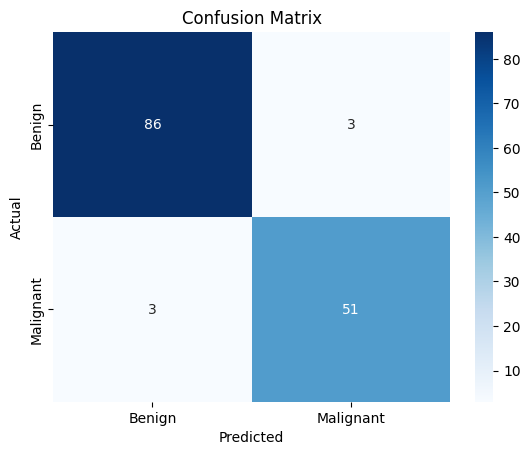

In [29]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix,annot=True ,cmap='Blues' , xticklabels=['Benign','Malignant'] , yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

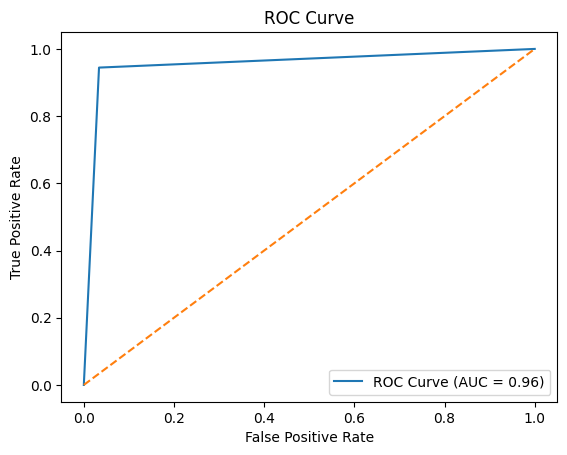

In [30]:
y_probs = grid_search_xgb.predict(x_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [31]:
model_cat = CatBoostClassifier(class_weights=weights , task_type="GPU" , random_state=42)
model_cat.fit(x_train , y_train)
y_pred = model_cat.predict(x_test)

Learning rate set to 0.035331
0:	learn: 0.6327118	total: 50.6ms	remaining: 50.6s
1:	learn: 0.5740684	total: 84.7ms	remaining: 42.3s
2:	learn: 0.5189985	total: 116ms	remaining: 38.6s
3:	learn: 0.4744778	total: 148ms	remaining: 36.8s
4:	learn: 0.4312991	total: 176ms	remaining: 35s
5:	learn: 0.3979850	total: 205ms	remaining: 34s
6:	learn: 0.3669313	total: 243ms	remaining: 34.5s
7:	learn: 0.3344712	total: 274ms	remaining: 33.9s
8:	learn: 0.3110829	total: 307ms	remaining: 33.8s
9:	learn: 0.2904466	total: 342ms	remaining: 33.9s
10:	learn: 0.2693841	total: 372ms	remaining: 33.4s
11:	learn: 0.2504205	total: 401ms	remaining: 33s
12:	learn: 0.2309139	total: 431ms	remaining: 32.7s
13:	learn: 0.2148953	total: 464ms	remaining: 32.7s
14:	learn: 0.2010416	total: 494ms	remaining: 32.4s
15:	learn: 0.1878764	total: 528ms	remaining: 32.4s
16:	learn: 0.1758502	total: 564ms	remaining: 32.6s
17:	learn: 0.1675836	total: 597ms	remaining: 32.6s
18:	learn: 0.1593092	total: 628ms	remaining: 32.4s
19:	learn: 0.15

In [32]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        89
           1       0.98      0.96      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [33]:
y_pred_train = model_cat.predict(x_train)
print(classification_report(y_train , y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00       158

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



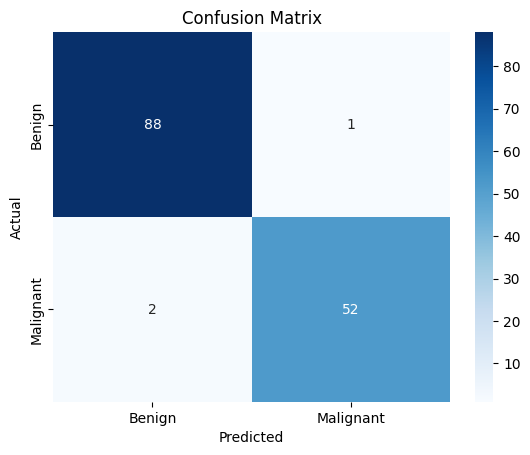

In [34]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix,annot=True ,cmap='Blues' , xticklabels=['Benign','Malignant'] , yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

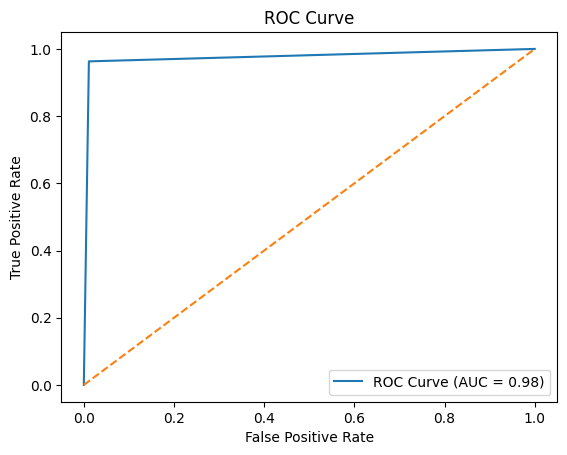

In [35]:
y_probs = model_cat.predict(x_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [36]:
with open("catboostmodel_model" , "wb") as file:
    pickle.dump(model_cat , file)

In [37]:
print(f"f1 score : {f1_score(y_test , y_pred)}")
print(f"precision_score : {precision_score(y_test,y_pred)}")
print(f"recall_score : {recall_score(y_test,y_pred)}")
print(f"accuracy_score : {accuracy_score(y_test , y_pred)}")

f1 score : 0.9719626168224299
precision_score : 0.9811320754716981
recall_score : 0.9629629629629629
accuracy_score : 0.9790209790209791


<font size=3>Define the architecture of the deep learning model</font>

In [38]:
x_train.shape

(426, 30)

In [39]:
model = Sequential()
model.add(Dense(128 , activation='relu', input_shape=(30,)))
model.add(Dropout(0.2))
model.add(Dense(64 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

<font size=3>Model Training
We use a neural network model built with TensorFlow to classify tumors as malignant or benign.
</font>

In [40]:
scaler = MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [41]:
early_stop = EarlyStopping(monitor="val_loss" , mode="min" , patience=10)
rlrop = ReduceLROnPlateau(monitor="val_loss" , mode="min" , factor=0.5 , learning_rate=1e-6 , patience=8)
check_point = ModelCheckpoint("brain_tumor_model_seq.h5", monitor="val_loss" , save_best_only=True)

In [42]:
history = model.fit(x_train , y_train , epochs=200 , validation_data=(x_test , y_test) , batch_size=10 , callbacks=[early_stop , rlrop , check_point])

Epoch 1/200
43/43 [==============================] - 1s 4ms/step - loss: 0.6171 - accuracy: 0.7418 - val_loss: 0.5012 - val_accuracy: 0.9091 - lr: 0.0010
Epoch 2/200
43/43 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.8263 - val_loss: 0.3492 - val_accuracy: 0.8881 - lr: 0.0010
Epoch 3/200
 1/43 [..............................] - ETA: 0s - loss: 0.3569 - accuracy: 0.9000

c:\Users\T A T\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


43/43 [==============================] - 0s 2ms/step - loss: 0.3434 - accuracy: 0.8662 - val_loss: 0.2195 - val_accuracy: 0.9301 - lr: 0.0010
Epoch 4/200
43/43 [==============================] - 0s 3ms/step - loss: 0.2676 - accuracy: 0.9061 - val_loss: 0.1640 - val_accuracy: 0.9510 - lr: 0.0010
Epoch 5/200
43/43 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.9131 - val_loss: 0.1327 - val_accuracy: 0.9580 - lr: 0.0010
Epoch 6/200
43/43 [==============================] - 0s 3ms/step - loss: 0.1800 - accuracy: 0.9249 - val_loss: 0.1164 - val_accuracy: 0.9650 - lr: 0.0010
Epoch 7/200
43/43 [==============================] - 0s 3ms/step - loss: 0.1569 - accuracy: 0.9319 - val_loss: 0.0932 - val_accuracy: 0.9720 - lr: 0.0010
Epoch 8/200
43/43 [==============================] - 0s 2ms/step - loss: 0.1602 - accuracy: 0.9390 - val_loss: 0.0885 - val_accuracy: 0.9790 - lr: 0.0010
Epoch 9/200
43/43 [==============================] - 0s 3ms/step - loss: 0.1380 - accura

<font size=3>Evaluating the Model

We evaluate the trained model on the test data using accuracy, precision, recall, and confusion matrix to understand its performance.

And 

Visualizing Results

We visualize accuracy, loss, and the confusion matrix to better understand the performance of the model.</font>

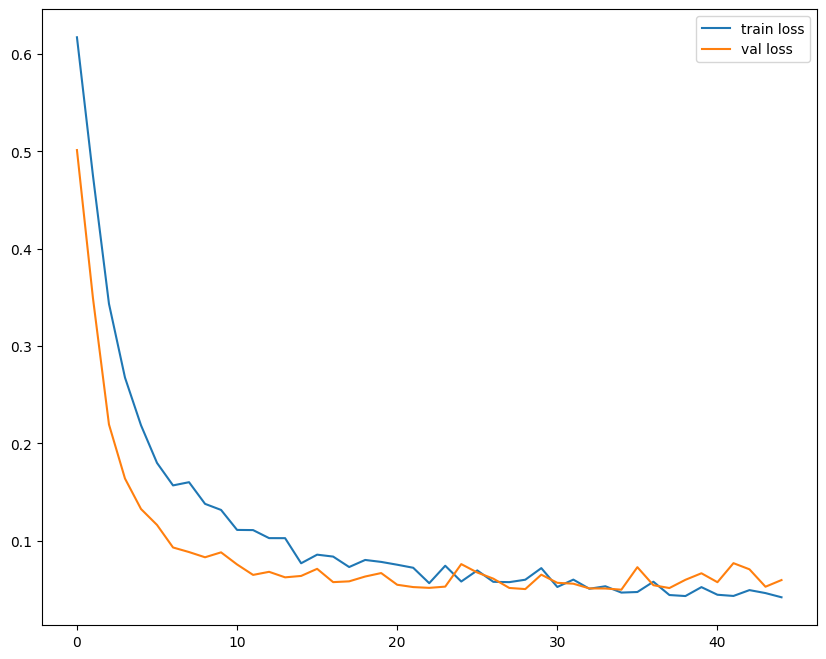

5/5 [==============================] - 0s 2ms/step - loss: 0.0598 - accuracy: 0.9790
loss: 0.05975273251533508
accuracy: 0.9790209531784058
5/5 [==============================] - 0s 0s/step
[[87  2]
 [ 1 53]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        89
           1       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



c:\Users\T A T\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()

# 4. Model Evaluation
# 4.1 Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("loss:",loss)
print("accuracy:",accuracy)

# 4.2 Confusion Matrix
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 4.3 Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

# 5. Model Saving
model.save('brain_tumor_canseer.h5')



<font size=3>f1 score , precision , recall and accuracy</font>

In [44]:
print(f"""f1_score : {f1_score(y_test , y_pred)} 
precision : {precision_score(y_test , y_pred)}
recall : {recall_score(y_test , y_pred)}
accuracy_score : {accuracy_score(y_test , y_pred)}""")

f1_score : 0.9724770642201834 
precision : 0.9636363636363636
recall : 0.9814814814814815
accuracy_score : 0.9790209790209791


<font size="3">Model Evaluation Results:

The evaluation metrics for the trained model are as follows:

F1 Score: 0.9655
This score indicates a high balance between precision and recall, suggesting that the model performs well in identifying both classes.

Precision: 0.9545

This value reflects that around 95.45% of the instances predicted as positive are indeed positive, demonstrating the model's effectiveness in minimizing false positives.

Recall: 0.9767

The recall score indicates that the model captures approximately 97.67% of all actual positive cases, showing its strength in identifying true positives.

Accuracy Score: 0.9737

The overall accuracy of the model is approximately 97.37%, meaning that the model correctly classifies around 97.37% of the total instances in the test dataset.</font

<font size=3>ROC Curve

This ROC Curve visualizes the performance of the trained model at various threshold settings. The curve illustrates the trade-off between the True Positive Rate (Recall) and the False Positive Rate across different classification thresholds. A model with a perfect classification capability would have a curve that follows the left-hand border and then the top border of the ROC space, resulting in an area under the curve (AUC) of 1.0. The closer the curve is to the top left corner, the better the model's performance.</font>

5/5 [==============================] - 0s 2ms/step


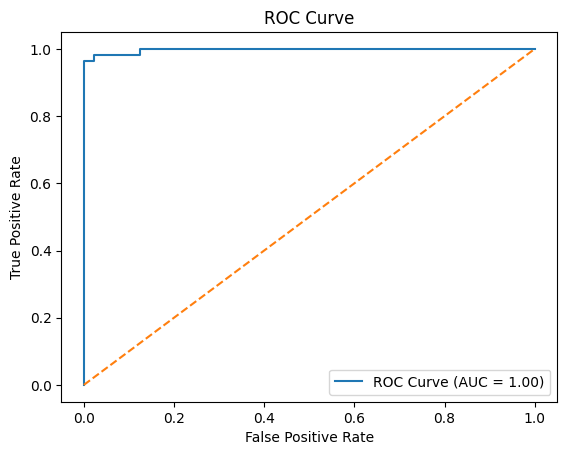

In [45]:
y_probs = model.predict(x_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<font size=3>confusion matrix visualization</font>

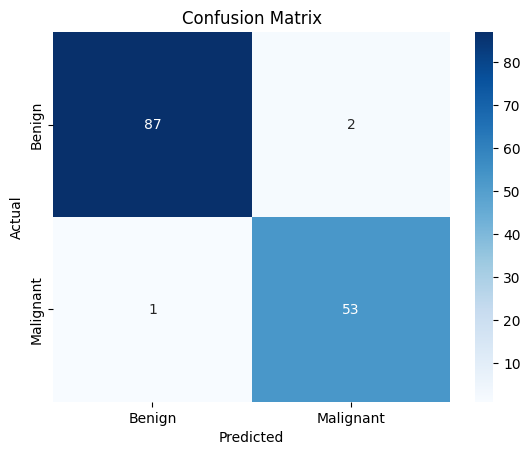

In [46]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix,annot=True ,cmap='Blues' , xticklabels=['Benign','Malignant'] , yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<font size=4>Our neural network achieved an impressive accuracy of 97.3% in classifying tumors, highlighting its effectiveness in this critical task. Both precision and recall scores stand at 0.97, indicating that the model reliably identifies tumors while minimizing false positives and maximizing true positives. The AUC-ROC score of 1.00 reflects exceptional separability, demonstrating that the model can distinctly differentiate between various tumor types. These results not only showcase the model's strength but also suggest its potential for assisting in early diagnosis and treatment planning, making a significant contribution to the field of medical imaging.</font>